<a href="https://colab.research.google.com/github/MihailAT/Class_test/blob/master/TT_cross_Black_Scholes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone --recursive https://github.com/oseledets/ttpy.git; cd ttpy; python setup.py install --user
# !!!!!! RESTART the kernel after this !!!!!!!!!##

Cloning into 'ttpy'...
remote: Enumerating objects: 2128, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 2128 (delta 9), reused 17 (delta 5), pack-reused 2100 (from 1)
Receiving objects: 100% (2128/2128), 715.44 KiB | 4.59 MiB/s, done.
Resolving deltas: 100% (1381/1381), done.
Submodule 'tt/cross/rectcross' (https://bitbucket.org/oseledets/rectcross) registered for path 'tt/cross/rectcross'
Submodule 'tt/tt-fort' (https://github.com/oseledets/tt-fort.git) registered for path 'tt/tt-fort'
Submodule 'tt/utils/rect_maxvol' (https://bitbucket.org/muxas/rect_maxvol) registered for path 'tt/utils/rect_maxvol'
Cloning into '/content/ttpy/tt/cross/rectcross'...
remote: Enumerating objects: 112, done.        
remote: Counting objects: 100% (112/112), done.        
remote: Compressing objects: 100% (107/107), done.        
remote: Total 112 (delta 56), reused 0 (delta 0), pack-reused 0 (from 0)        
Receiving objects: 100% (1

In [ ]:
!pip uninstall numpy
!pip install numpy==1.22.4

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/lib/python3.10/dist-packages/numpy-1.26.4.dist-info/*
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-0cf96a72.3.23.dev.so
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.10/dist-packages/numpy/*
Proceed (Y/n)? y
  Successfully uninstalled numpy-1.26.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 73.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albucore 0.0.16 requires numpy>=1.24, but you have numpy 1.22.4 which is incompatible.
albumentations 1.4.15 requires numpy>=1.24.4, but you have numpy 1.22.4 which is incompatible.
arviz 0.19.0

In [ ]:
!pip install py_vollib

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 3.4 MB/s eta 0:00:00
  Created wheel for py_vollib: filename=py_vollib-1.0.1-py3-none-any.whl size=62831 sha256=1cc15940a208b18b27ad7ae4c6b8d40676f638fcd4ab5780b196b539500016b8
  Stored in directory: /root/.cache/pip/wheels/84/0c/fc/b68506eda40cccaeb0013be550ba904d253ec90eae2b156052
  Created wheel for py_lets_be_rational: filename=py_lets_be_rational-1.0.1-py3-none-any.whl size=24451 sha256=ffce3b305a9f951cfb6696d1328f9522bce58dea1f470f0f5084ee401e4f1cc5
  Stored in directory: /root/.cache/pip/wheels/32/d9/4f/360d4b0b9ec7c65583ec7c8e72fd2158c97ad04fbcb932891c
Successfully built py_vollib py_lets_be_rational


#Import

In [ ]:
import numpy as np
import tt
import matplotlib.pyplot as plt
from tt.cross import rect_cross
import time
from py_vollib.black_scholes import black_scholes as bs

# Parameter domain

In [ ]:
S_min = 80.0
S_max = 120.0

K_min = 90.0
K_max = 110.0

T_min = 1.0
T_max = 5.0

r_min = 0.0
r_max = 0.1

sigma_min = 0.01
sigma_max = 0.40

In [ ]:
d = 5 #dimension
n = 100 #discretization in one axis
tol = 1e-4 #tt-cross tollerance

In [ ]:
#grid step sizes
hS = (S_max - S_min) / (n - 1)
hK = (K_max - K_min) / (n - 1)
hT = (T_max - T_min) / (n - 1)
hr = (r_max - r_min) / (n - 1)
hsigma = (sigma_max - sigma_min) / (n - 1)

#Black-Scholes sampling function

In [ ]:
def BS_sampling(x):
  # x is np.array of shape [n_samples, d]
  # this function should return array of function values in all samples, i.e. return size = n_samples

  prices = []

  for i in range(x.shape[0]):
    S = x[i, 0] * hS + S_min
    K = x[i, 1] * hK + K_min
    T = x[i, 2] * hT + T_min
    r = x[i, 3] * hr + r_min
    sigma = x[i, 4] * hsigma + sigma_min

    prices.append(bs('c', S, K, T, r, sigma))

  return np.array(prices)

#TT-cross

In [ ]:
BS_tensor = rect_cross.cross(lambda arg: BS_sampling(arg), # target function
                                         tt.rand(n, d, r = 5), # initial approximation
                                         nswp = 10, # number of sweeps (iterations)
                                         eps=tol, # tolerance
                                         kickrank=3, # how much the rank is increased during the algorithm
                                         rf=1,
                                         verbose= True # Printing the intermediate results
                                         )

print(BS_tensor.r)

BS_tensor  = BS_tensor.round(tol)
print(BS_tensor.r)

swp: 0/9 er_rel = 1.3e+00 er_abs = 3.5e+06 erank = 11.0 fun_eval: 41600
swp: 1/9 er_rel = 9.8e-03 er_abs = 2.5e+04 erank = 17.3 fun_eval: 167800
swp: 2/9 er_rel = 3.5e-03 er_abs = 9.0e+03 erank = 24.2 fun_eval: 434500
swp: 3/9 er_rel = 2.4e-03 er_abs = 6.1e+03 erank = 31.5 fun_eval: 907900
swp: 4/9 er_rel = 3.7e-04 er_abs = 9.5e+02 erank = 39.5 fun_eval: 1678700
swp: 5/9 er_rel = 1.4e-04 er_abs = 3.6e+02 erank = 47.5 fun_eval: 2831900
swp: 6/9 er_rel = 1.0e-04 er_abs = 2.6e+02 erank = 55.5 fun_eval: 4444300
swp: 7/9 er_rel = 4.6e-05 er_abs = 1.2e+02 erank = 63.5 fun_eval: 6592700
[ 1 61 63 64 66  1]
[ 1 12 14 27  8  1]


In [ ]:
print(BS_tensor)

#Evaluation

In [ ]:
S = 90
K = 100
T = 2
r = 0.05
sigma = 0.2

In [ ]:
#find an appropiate grid point
si = round((S - S_min) / hS)
stt = tt.delta(n, 1, center = si)

ki = round((K - K_min) / hK)
ktt = tt.delta(n, 1, center = ki)

ti = round((T - T_min) / hT)
Ttt = tt.delta(n, 1, center = ti)

ri = round((r - r_min) / hr)
rtt = tt.delta(n, 1, center = ri)

sigmai = round((sigma - sigma_min) / hsigma)
sigmatt = tt.delta(n, 1, center = sigmai)

print(si, ki, ti, ri, sigmai)

25 50 25 50 48


Create a rank one delta-tensor from indicies

In [ ]:
x = tt.mkron(stt, ktt, Ttt, rtt, sigmatt)
print(x.r)

[1 1 1 1 1 1]


Scalar product - price at point x

In [ ]:
tt.dot(BS_tensor, x)

9.963842596175615

Check

In [ ]:
bs('c', S, K, T, r, sigma)

9.908803548981254

#Ploting

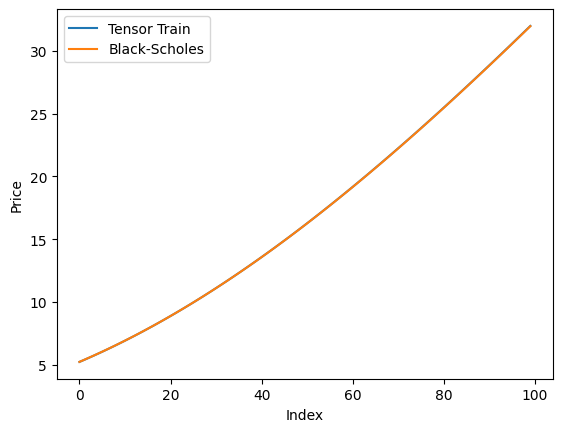

In [ ]:
prices_TT = []
prices_BS = []
for si in range(n):
  #TT calculation
  stt = tt.delta(n, 1, center = si)
  x = tt.mkron(stt, ktt, Ttt, rtt, sigmatt)
  prices_TT.append(tt.dot(BS_tensor, x))

  #BS calculation
  S = si * hS + S_min
  prices_BS.append(bs('c', S, K, T, r, sigma))


plt.plot(prices_TT, label = 'Tensor Train')
plt.plot(prices_BS, label = 'Black-Scholes')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.show()